# Dependence of $\tau_r$ on $D_r$

Dr = 0.1
tau_r = 10.05
Dr = 0.2
tau_r = 5.13
Dr = 0.3
tau_r = 3.41
Dr = 0.4
tau_r = 2.58
Dr = 0.5
tau_r = 1.90
Dr = 0.6
tau_r = 1.72
Dr = 0.7
tau_r = 1.45
Dr = 0.8
tau_r = 1.23
Dr = 0.9
tau_r = 1.11
Dr = 1.0
tau_r = 1.00


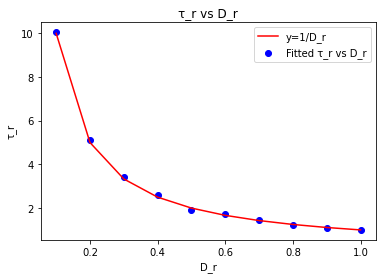

In [1]:
import numpy as np
from numpy import sin, cos, exp, sqrt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(5003)

samples = 50
N = 1000  # number of steps
h = 0.1 # step size
Ts = np.arange(0, N*h, step=h)

phi = np.zeros(N) # array for direction of motion
Dr = np.linspace(0.1,1,10)
tau_r = np.zeros(10)

z_mu = 0
z_sd = sqrt(1/h)

def auto_corr(t, tau):
    return exp(-abs(t)/tau)

for idx, dr in enumerate(Dr):
    print(f'Dr = {dr:.1f}')
    acf = np.zeros((samples, N))
    for ns in range(samples):
        zetas = np.random.normal(z_mu, z_sd, (N-1))
    
        # Euler method for phi, x and y
        for i in range(1,N):
            phi[i] = phi[i-1] + h*zetas[i-1]*sqrt(2*dr)
    
        sinphi = sin(phi)
        cosphi = cos(phi)
    
        for t in range(N):
            ac = 0
            for s in range(N-t):
                ac += cosphi[s]*cosphi[s+t]+sinphi[s]*sinphi[s+t]
            acf[ns,t] = ac/(N-t)
    
    tau0 = 1
    macf = acf.mean(axis=0)
    c = int(1/(dr*h))
    tau_fit = curve_fit(auto_corr, Ts[:c], macf[:c], p0=[tau0])[0][0]
    print(f'tau_r = {tau_fit:.2f}')
    tau_r[idx] = tau_fit

plt.scatter(Dr, tau_r, c='b', label='Fitted \u03C4_r vs D_r')
plt.plot(Dr, 1/Dr, c='r', label='y=1/D_r')
plt.xlabel('D_r')
plt.ylabel('\u03C4_r')
plt.title('\u03C4_r vs D_r')
plt.legend()
plt.show()

# Mean square displacement with selected $v$ and $\tau_r=1/D_r$

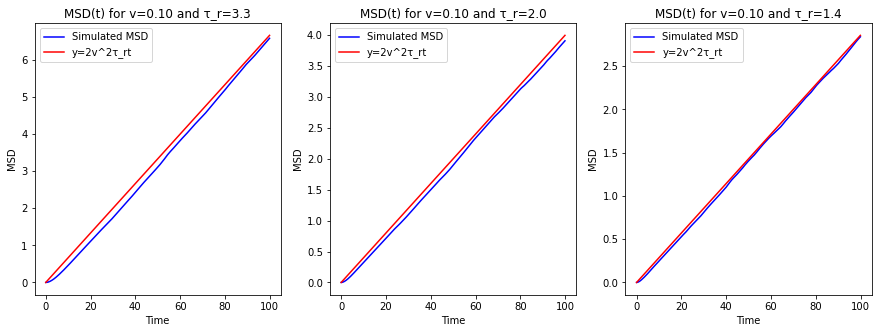

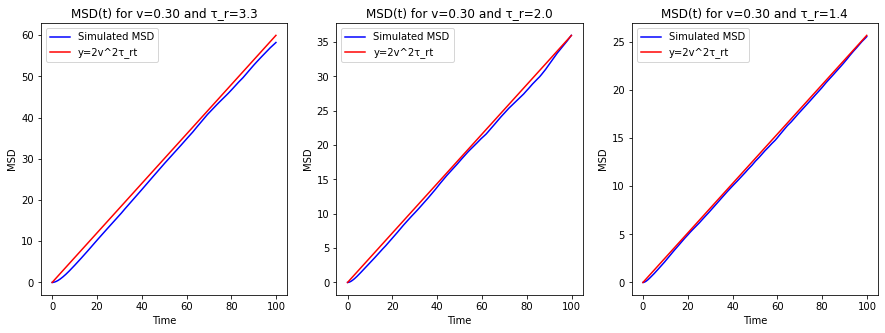

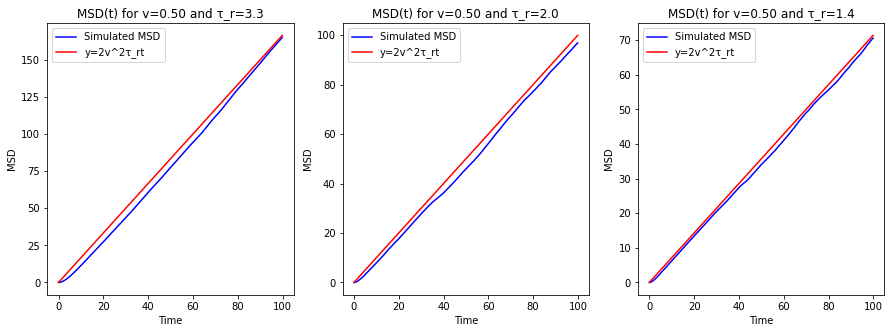

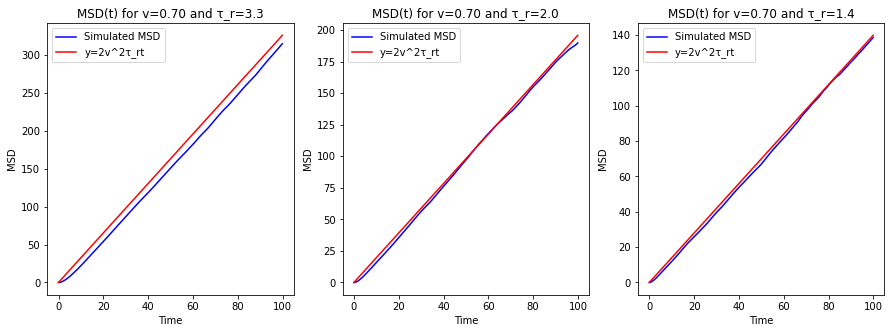

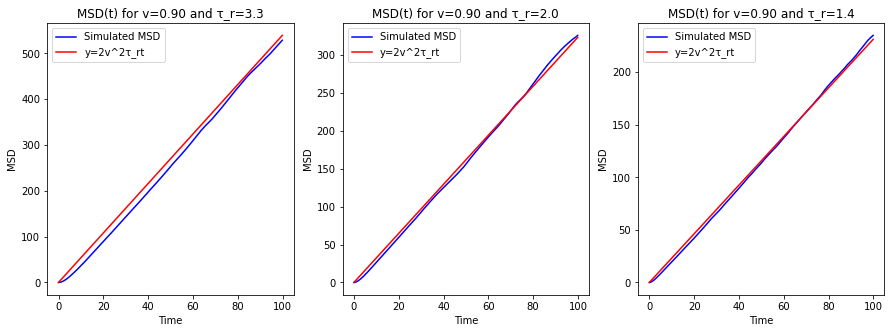

In [2]:
np.random.seed(5003)

samples = 3000
N = 1000  # number of steps
h = 0.1 # step size
Ts = np.arange(0, N*h, step=h)

phi = np.zeros(N) # array for direction of motion
x = np.zeros(N) # array for x 
y = np.zeros(N) # array for y
Dr = [0.3,0.5,0.7]
V = [0.1,0.3,0.5,0.7,0.9]
msd = np.zeros((10,N))

z_mu = 0
z_sd = sqrt(1/h)

for v in V:
    plt.figure(figsize=(15,5))
    for idx, dr in enumerate(Dr):
        sd = np.zeros((samples, N))
        for ns in range(samples):
            zetas = np.random.normal(z_mu, z_sd, (N-1))   
            for i in range(1,N):
                phi[i] = phi[i-1] + h*zetas[i-1]*sqrt(2*dr)
                x[i] = x[i-1] + h*v*cos(phi[i-1])
                y[i] = y[i-1] + h*v*sin(phi[i-1])
                sd[ns,i] = x[i]**2 + y[i]**2
        # Plotting
        plt.subplot(1,len(Dr),idx+1)
        plt.plot(Ts, sd.mean(axis=0), 'b', label='Simulated MSD')
        plt.plot(Ts, 2*v**2*Ts/dr, 'r', label=f'y=2v^2\u03C4_rt')
        plt.title(f'MSD(t) for v={v:.2f} and \u03C4_r={1/dr:.1f}')
        plt.xlabel('Time')
        plt.ylabel('MSD')
        plt.legend()
    plt.show()
